In [25]:
from dotenv import load_dotenv

load_dotenv()

True

In [26]:
!aws s3 ls

2024-01-04 05:42:12 bgp-ls-demo
2023-12-11 18:23:17 co-graph-drive-bucket-1
2023-06-05 05:14:22 deployed-ignatella-app-pets
2023-04-26 01:07:08 deployed-ignatella-tfstate
2024-03-18 12:22:52 ignatella-ray
2023-06-16 10:25:15 pt-ignatella-tfstate
2024-03-26 17:06:02 sagemaker-eu-north-1-422901541742
2024-03-26 14:51:07 sagemaker-studio-422901541742-45qvfhp8mmb
2024-03-26 14:39:15 sagemaker-studio-422901541742-dy8sadfa9t8
2024-03-26 17:05:58 sagemaker-studio-422901541742-ysuogi77x5e
2024-03-26 14:39:18 sagemaker-us-east-1-422901541742


In [27]:
import boto3

client = boto3.client('textract', region_name="eu-west-1")

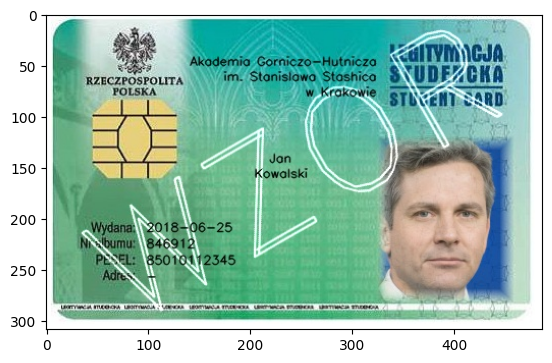

In [28]:
# with opecnv show ./driving-licence/person01.jpg

import cv2
import matplotlib.pyplot as plt

image_path = './els/person01.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [29]:
with open(image_path, "rb") as document_file:
    document_bytes = document_file.read()

response = client.analyze_document(
    Document={"Bytes": document_bytes}, 
    FeatureTypes=['LAYOUT', 'QUERIES'], 
    QueriesConfig={
        'Queries': [
            {
                'Text': 'What is the document title?'
            },
            {
                'Text': 'What is the person surname?'
            },
            {
                'Text': 'What is the person PESEL?'
            }
        ]
    },
)

In [30]:
queries = [block for block in response['Blocks'] if block['BlockType'].startswith('QUERY')]

questions = [query['Query']['Text'] for query in queries if query['BlockType'] == 'QUERY']
answers = [query['Text'] for query in queries if query['BlockType'] == 'QUERY_RESULT']

for question, answer in zip(questions, answers):
    print(f"{question}: {answer}")

What is the document title?: Akodemia Gorniczo-Hutnicza
What is the person surname?: Jan Kowalski
What is the person PESEL?: 85010112345


In [31]:
response

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 0.9970722794532776,
     'Height': 0.9917212128639221,
     'Left': 0.002265096874907613,
     'Top': 0.00365394726395607},
    'Polygon': [{'X': 0.002265096874907613, 'Y': 0.00365394726395607},
     {'X': 0.9965637922286987, 'Y': 0.004692570772022009},
     {'X': 0.999337375164032, 'Y': 0.9953751564025879},
     {'X': 0.0035435371100902557, 'Y': 0.9936792254447937}]},
   'Id': 'e85ee376-b4ff-43c7-9057-e51e5c12686d',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['355a6ea2-f439-4717-9950-cbde135c4a88',
      '7f450af6-5693-45de-8c7c-9b0152c0d0de',
      '6130f81b-3840-4ae8-acf2-fc19396e954b',
      '9cc07416-4654-4af3-aefa-1380c8ed4a29',
      'a5fae4ee-a545-4b4d-b48e-8a5320576b94',
      'c5aef91e-b396-465b-a303-70fde62d7a59',
      'beab50a2-1719-4466-884f-015b21d3878b',
      'd8804701-a0b7-4eb3-b424-b017af1aa97f',
      '55a140b3-4242-410e-ba35-42ab40fe4d2d',
      '1d

In [32]:
[b['Text'] for b in response['Blocks'] if b['BlockType'] == 'WORD']

['Akodemia',
 'Gorniczo-',
 '-',
 'Hutnicza',
 'COITYMNCJA',
 'RZECZPOSPOLITA',
 'im.',
 'Stanislawa',
 'Stoshica',
 '8',
 'UDFACKA',
 'POLSKA',
 'W',
 'Krakowie',
 'STURENT',
 'CARD',
 'Jan',
 'Kowalski',
 'Wydana:',
 '2018-06-25',
 'N',
 'bumu:',
 '846912',
 'PESEL:',
 '85010112345',
 'Adre',
 'MEDICAL',
 'LENTINAGUA',
 ':',
 'LORNERA',
 'LESTIMACIA']